In [2]:
cd ../jecs

/Users/dan/Documents/GitHub/ExpPro/jecs


In [3]:
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 
import torch
import os
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 
import numpy as np
import importlib
import train
import dataset

Computation device: cpu



In [13]:
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")


Computation device: cpu



In [4]:
directory_path = '/Users/dan/Downloads/download'
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path)]
file_paths

['/Users/dan/Downloads/download/QCD_Pt-470to600_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/dan/Downloads/download/GluGluToHToZZTo4L_M-125_7TeV-minloHJJ-pythia6-tauola_merged.root',
 '/Users/dan/Downloads/download/TTJets_MSDecays_central_TuneZ2_7TeV-madgraph-tauola_merged.root',
 '/Users/dan/Downloads/download/QCD_Pt-600to800_TuneZ2_7TeV_pythia6_merged.root']

In [23]:
fp=['/Users/dan/Downloads/download/QCD_Pt-600to800_TuneZ2_7TeV_pythia6_merged.root','/Users/dan/Downloads/download/GluGluToHToZZTo4L_M-125_7TeV-minloHJJ-pythia6-tauola_merged.root']
pts2=[]
etas2=[]
area2=[]
npvs2=[]
gen_pts2=[]
jecs2=[]
for current_pts2, current_etas2, current_area2, current_npvs2, current_gen_pts2, current_jecs2 in load_root_files(fp):
    pts2.extend(current_pts2)
    etas2.extend(current_etas2)
    area2.extend(current_area2)
    npvs2.extend(current_npvs2)
    gen_pts2.extend(current_gen_pts2)
    jecs2.extend(current_jecs2)

In [ ]:

pts3=np.array(pts2)
etas3=np.array(etas2)
area3=np.array(area2)
npvs3=np.array(npvs2)
gen_pts3=np.array(gen_pts2)
jecs3=np.array(jecs2)

In [14]:
mask = pts3 > 450
pts3 = pts3[mask]
etas3 = etas3[mask]
area3 = area3[mask]
npvs3 = npvs3[mask]
gen_pts3 = gen_pts3[mask]
jecs3 = jecs3[mask]

In [7]:
# Load the dataset from energyflow
pts, etas, area, npvs, gen_pts, jecs = load_energy_flow()

In [8]:
#pts, etas, area, npvs, gen_pts, jecs 
# Create a hashtable (dictionary) for the first set of lists
hashtable = {}
for i in range(len(pts)):
    key = (pts[i], etas[i], area[i], jecs[i])
    if key not in hashtable:
        hashtable[key] = 1
    else:
        hashtable[key] += 1

In [9]:
# Initialize new lists for entries not in the hashtable
new_pts = []
new_etas = []
new_area = []
new_npvs = []
new_gen_pts = []
new_jecs = []

# Iterate over the second set of lists and check if the entries are not in the hashtable
for i in range(len(pts2)):
    key = (pts2[i], etas2[i], area2[i], jecs2[i])
    if key not in hashtable:
        new_pts.append(pts2[i])
        new_etas.append(etas2[i])
        new_area.append(area2[i])
        new_npvs.append(npvs2[i])
        new_gen_pts.append(gen_pts2[i])
        new_jecs.append(jecs2[i])

# Output the new lists
new_pts, new_etas, new_area, new_npvs, new_gen_pts, new_jecs
##pts2, etas2, area2, npvs2, gen_pts2, jecs2

([490.17776,
  480.95303,
  38.86394,
  31.276697,
  510.6501,
  437.6316,
  73.22498,
  534.0034,
  500.87463,
  465.20792,
  391.63242,
  79.53477,
  554.0172,
  530.41833,
  460.32974,
  383.99185,
  145.98964,
  27.004765,
  25.81569,
  557.27405,
  535.07587,
  524.9668,
  511.8659,
  95.142746,
  39.62535,
  28.78598,
  23.06989,
  457.28146,
  396.75192,
  23.420319,
  535.995,
  528.7807,
  524.93164,
  495.0635,
  42.887596,
  509.31305,
  448.19247,
  351.1586,
  285.43723,
  283.83566,
  218.23312,
  79.946396,
  76.973045,
  34.479473,
  445.7262,
  393.6327,
  92.97858,
  32.187515,
  28.148163,
  496.66275,
  404.6108,
  180.46597,
  484.32413,
  470.9172,
  443.26035,
  395.67783,
  19.542984,
  487.161,
  442.02658,
  50.192295,
  42.031666,
  547.01227,
  530.9892,
  37.60235,
  515.2952,
  490.3928,
  30.359709,
  28.881935,
  454.7144,
  383.76804,
  106.79893,
  80.2478,
  65.23711,
  62.165474,
  34.47069,
  428.89282,
  238.60515,
  197.00877,
  24.709852,
  333.5

In [10]:
final_pts=np.concatenate((pts,new_pts))
final_etas=np.concatenate((etas,new_etas))
final_area=np.concatenate((area,new_area))
final_npvs=np.concatenate((npvs,new_npvs))
final_gen_pts=np.concatenate((gen_pts,new_gen_pts))
final_jecs=np.concatenate((jecs,new_jecs))

In [11]:
jec_dataset = JetEnergyCorrectionDataset(final_pts, final_etas, final_area, final_npvs, final_gen_pts, final_jecs)

Computation device: cpu

Epoch 1/5, Train Loss: 0.188536275, Validation Loss: 0.180314260

Best validation loss: 0.1803142602713079

Saving best model for epoch: 1

Epoch 2/5, Train Loss: 0.178600629, Validation Loss: 0.175368214

Best validation loss: 0.17536821379425274

Saving best model for epoch: 2

Epoch 3/5, Train Loss: 0.176972027, Validation Loss: 0.180356992
Epoch 4/5, Train Loss: 0.176237543, Validation Loss: 0.174936026

Best validation loss: 0.17493602613551198

Saving best model for epoch: 4

Epoch 5/5, Train Loss: 0.175824989, Validation Loss: 0.175135156


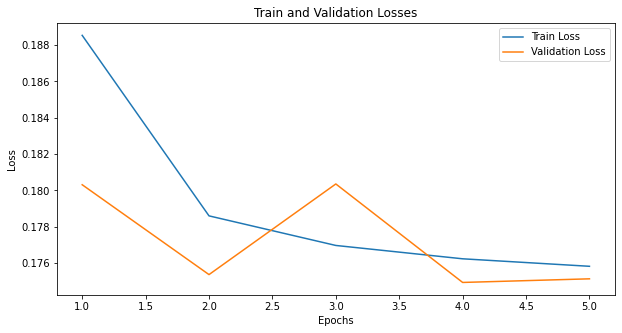

In [15]:
importlib.reload(train)
from j_model import ShallowMLP

j_model = ShallowMLP()
j_model.to(device)

train.train(j_model, jec_dataset,num_epochs=5)

In [18]:
x=np.transpose(np.array([final_pts,final_etas,final_area,final_npvs,final_gen_pts]))
y=np.array(final_jecs)


In [24]:
x2=np.transpose(np.array([pts2,etas2,area2,npvs2,gen_pts2]))
y2=np.array(jecs2)

In [21]:
from dataset import save_scaler, load_scaler
save_scaler(jec_dataset.scaler_x, jec_dataset.scaler_y)

Test MSE: 0.15817393362522125


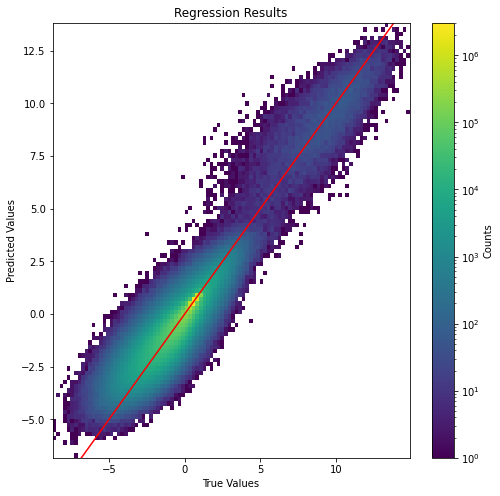

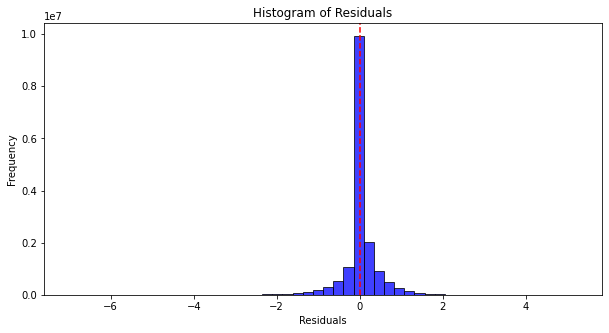

In [25]:
importlib.reload(dataset)

import eval_multiple_src as eval

importlib.reload(eval)
eval.run(x2,y2)

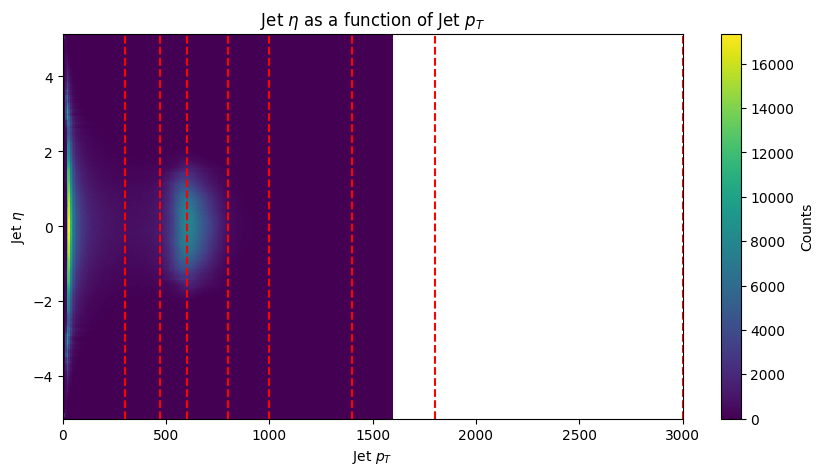

In [28]:
#not relevant to the model, just the data itself
from matplotlib import pyplot as plt
bins=np.array([300,470,600,800,1000,1400,1800,3000])

plt.figure(figsize=(10, 5))
plt.hist2d(pts2, etas2, bins=[200, 200], cmap='viridis')
plt.xlabel('Jet $p_T$')
plt.ylabel('Jet $\eta$')
plt.title('Jet $\eta$ as a function of Jet $p_T$')
plt.colorbar(label='Counts')

# Plot vertical lines for each bin value
for bin_value in bins:
    plt.axvline(x=bin_value, color='red', linestyle='--')

plt.xlim(0, 3000)

plt.show()
